# Introducción a Física de Partículas


## Boletín de problemas I


Jose A. Hernando

*Departamento de Física de Partículas. Universidade de Santiago de Compostela*

Octubre 2021


In [1]:
import time
print(' Last version ', time.asctime() )

 Last version  Tue Nov  7 16:33:43 2023


In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import scipy.constants as units

## Unidades 

In [3]:
print('hbar = {:4e} J/s'.format(units.hbar))
print('c  = {:4e} m/s'.format(units.c))
GeV_to_Julio = units.giga * units.eV
print('GeV  = {:4e} J '.format(GeV_to_Julio))
hbarc = units.hbar * units.c / (GeV_to_Julio * units.femto) # GeV fm
print('hbar c  =  {:4e} GeV fm'.format(hbarc))

hbar = 1.054572e-34 J/s
c  = 2.997925e+08 m/s
GeV  = 1.602177e-10 J 
hbar c  =  1.973270e-01 GeV fm


In [4]:
me = (units.m_e * units.c**2)/(GeV_to_Julio) # GeV
mp = (units.m_p * units.c**2)/(GeV_to_Julio) # GeV

print('electron mass {:4.3f} MeV'.format(me *1e3))
print('proton   mass {:4.3f} GeV'.format(mp))

electron mass 0.511 MeV
proton   mass 0.938 GeV


In [5]:
energy         = lambda m, p : np.sqrt(m**2 + p**2)
momentum       = lambda m, E : np.sqrt(E**2 - m**2)
gamma_lorentz  = lambda m, E : m/E
beta_lorentz   = lambda p, E : p/E
kinetic_energy = lambda m, E : E - m

In [6]:
mass_invariant   = lambda p: np.sqrt(p[0]**2 - momentum_module(p)**2)
momentum_module  = lambda p: np.sqrt( p[1:].dot(p[1:]) )
phi_angle        = lambda p: np.arctan2(p[2], p[1])

def theta_angle(p):
    rho   = np.sqrt(p[1]**2 +p[2]**2)
    theta = np.arctan2(rho, p[3])
    phi   = np.arctan2(p[2], p[1])
    return theta if phi < np.pi/2 else -theta

def lorentz_matrix(beta):
    gamma = 1/np.sqrt(1 - beta**2)
    lorentz = np.zeros(16).reshape(4, 4)
    lorentz[0, 0] = gamma; lorentz[0, 3] =  gamma * beta
    lorentz[1, 1] = 1    ; lorentz[2, 2] = 1
    lorentz[3, 3] = gamma; lorentz[3, 0] =  gamma*beta
    return lorentz

def lorentz_transform(beta, p):
    lorentz = lorentz_matrix(beta)
    return lorentz.dot(p.transpose())

def p_write(p, name):
    print('{:s}:  p  = [{:4.3f}, {:4.3f}, {:4.3f}, {:4.3f}]'.format(name, *p))
    print('{:s}: |p| =  {:4.3f}, mass = {:4.3f}'.format(name, momentum_module(p), mass_invariant(p)))
    return

In [7]:
energy_cm_2body_s   = lambda s , mb, mc: (s + mb**2 - mc**2)/ (2 * np.sqrt(s))
energy_cm_2body     = lambda ma, mb, mc: energy_cm_2body_s(ma**2, mb, mc)  
momentum_cm_2body_s = lambda s , mb, mc: np.sqrt( (s - (mb + mc)**2) * ( s - (mb - mc)**2) )/ (2 * np.sqrt(s))
momentum_cm_2body   = lambda ma, mb, mc: momentum_cm_2body_s(ma**2, mb, mc) 

### 1.2 ejercicio

¿Cuál es la energía y velocidad de una partícula de 3 GeV de masa con un momento de 4 GeV en la dirección $z$? 

energy   (MeV) 5.000
velocity (beta) 0.80 velocity (m/s) 2.398340e+08


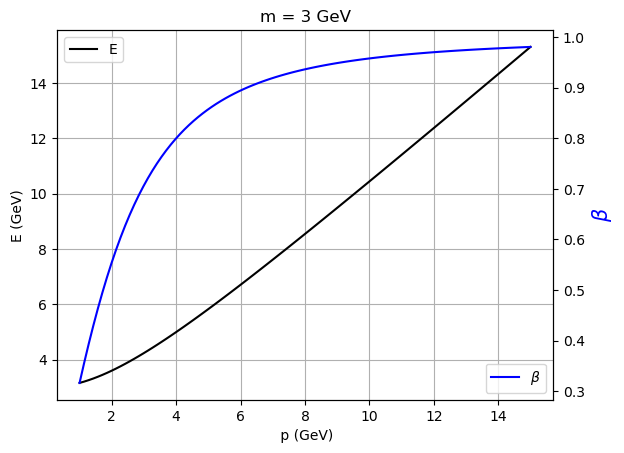

In [8]:
m, p   = 3, 4 # GeV
E      = energy(m, p)
b      = beta_lorentz(p, E)
print('energy   (MeV) {:3.3f}'.format(E))
print('velocity (beta) {:3.2f} velocity (m/s) {:2e}'.format(b, b * units.c))

ps = np.linspace(1, 15, 100)
plt.plot(ps, energy(m, ps), c = 'black', label = 'E')
plt.xlabel(' p (GeV)'); plt.ylabel('E (GeV)'); plt.title('m = 3 GeV')
plt.grid(); plt.legend();
ax = plt.gca().twinx()
plt.plot(ps, beta_lorentz(ps, energy(m, ps)), c = 'blue', label = r'$\beta$')
plt.ylabel(r'$\beta$', c = 'blue', fontsize = 15); plt.legend(loc=4);

### 1.3 ejercicio

Compara energía de un Boeing 747, cuya masa es 400 toneladas, a su velocidad crucero de 850 km/h, con la aniquilación de un mosquito por un antimosquito, siendo la masa del mosquito 1 mg. [AB.1P1]

In [9]:
mb = 400e3  # kg
mm = 1.0e-6 # kg
v  = 850e3/(60*60) # m/s
boeing_ene   = 0.5 * mb * v**2
mosquito_ene = 2   * mm * units.c**2
print('energy boeing/mosquito {:4.3f}'.format(boeing_ene/mosquito_ene))
print('boeing {:e} J, mosquito {:e} J'.format(boeing_ene, mosquito_ene))
print('boeing {:e} GeV, mosquito {:e} GeV'.format(boeing_ene/GeV_to_Julio, mosquito_ene/GeV_to_Julio))

energy boeing/mosquito 0.062
boeing 1.114969e+10 J, mosquito 1.797510e+11 J
boeing 6.959090e+19 GeV, mosquito 1.121918e+21 GeV


### 1.4 ejercicio

La vida media del $\pi^0$ es $\tau_{\pi} = 8.4 \, 10^{-17}$ s, ¿cuál es su anchura de desintegración?. La anchura del mesón $\eta$ es $\Gamma_\eta = $ 1.3 keV, ¿Cuál es su vida media? [AB.1.5]

In [10]:
gamma = lambda tau   : units.hbar / (tau * units.eV)
tau   = lambda gamma : units.hbar / (gamma * units.eV)
tau_pi    = 8.4e-17 # 1/s
gamma_eta = 1.3e3  # eV
print(' Gamma pi {:e} eV'.format(gamma(tau_pi)))
print(' tau eta {:e} s'.format(tau(gamma_eta)))

 Gamma pi 7.835857e+00 eV
 tau eta 5.063169e-19 s


### 1-5 ejercicio:

Da en unidades naturales los valores:

  * a) fs y fm en potencias de GeVs. 

  * b) m, s en potencias de eV.

  * c) barn en función de GeV.

a) sabemos $\hbar c = 197 $ MeV fm = 1, luego fm $= \frac{1}{197}$ MeV$^{-1}$

c) sabemos $c = 2.9998 \, 10^8$ m/s = 1,luego s $= 2.9998 \, 10^8$ m, luego fs = c fm 

d) sabemos 1 barn = $10^{-28}$ m$^2$, cambiamos m a 1/GeV

In [11]:
print('hbarc = {:e} GeV fm'.format(hbarc))
fm_un = 1/hbarc #1/GeV
print('fm    = {:e} 1/GeV '.format(fm_un))
ps_un = units.femto * (units.c / (units.femto)) * fm_un
print('fs    = {:e} 1/GeV '.format(ps_un))
m_un = fm_un/(units.femto) # 1/GeV
print('m  = {:e} 1/eV, eV = {:e} 1/m '.format(m_un/units.giga, units.giga/m_un))
#s_un = fs_un / (units.femto)
#print('s  = {:e} 1/eV, eV = {:e} 1/s '.format(s_un/units.giga, units.giga/s_un))
m_un = fm_un / (units.femto)
barn = 1e-28 * (m_un)**2
print('barn = {:e} 1/GeV2 '.format(barn))

hbarc = 1.973270e-01 GeV fm
fm    = 5.067731e+00 1/GeV 
fs    = 1.519267e+09 1/GeV 
m  = 5.067731e+06 1/eV, eV = 1.973270e-07 1/m 
barn = 2.568189e+03 1/GeV2 


## Experimentos de blanco fijo y colisionador

### 2.1 ejercicio

Demostrar que los procesos: $\gamma \to e + e^+$, $e + \gamma \to e$ no pueden tener lugar. [AB1.4]

En ambos casos no se conserva la energía y el momento entre el estado inicial y final

a) Para $\gamma \to e + e^+$.

Sea $a = \gamma, b = e, c = e^+$, se cumple $p_a = p_b + p_c$. En el CM del sistema final  $p_b = (E, {\bf p}), p_c = (E, - {\bf p})$, que hace $p_b + p_c = (2E, {\bf 0})$, donde $E = 2 \sqrt{m^2_e + p^2} \ge 2m_e \gt 0$ mientras que en estado inicial $p_a = (E_i, E_i)$, lo que obligaría a que el fotón estuviese en reposo y en ese caso $E_i = 0$, .

b) Para el caso $e + \gamma \to e$. Sea $a + b \to c$. En el CM el estado final es $(m_e, {\bf0})$ que debe ser igual a $p_a + p_b, \, p_a= (E_e, {\bf p}), p_b = (p, -{\bf p})$, Ese hace:

$$
m^2_e = E^2_e + p^2 + 2Ep = m^2_e + 2 E_e p
$$
pero como $E_e \gt m_e$, no puede cumplirse





### 2.2 ejercicio

Sean tres protones de $p = 3$ GeV emitidos entre ellos $120^o$ en un plano. ¿cuál es su masa invariante? [AB1.P2]

La masa invariante de un sistema de n-partículas con cuadrimomentos $p_i$ con $i=1, \dots, n$ es:

$$
m^2 = \left( \sum_i p_i\right)^2
$$


En la suma de los cuadrimomentos el momento se anula y la energís es:

$$
\sum_i p_i = (3E, 0)
$$

Luego la masa es $3E$. 

In [12]:
pp = 3 # GeV
mp = units.m_p * units.c**2 / GeV_to_Julio # GeV
ene = energy(mp, pp)
print('mass {:4.3f} GeV '.format(3 * ene))

mass 9.430 GeV 


### 2.3 ejercicio

Calcula la luminosidad equivalente de un haz de protones de intensidad $10^{13}$ 1/s que golpea un tanque de 10 cm de hidrógeno líquido, $\rho = 60$ kg/m$^3$. [AB1.6]

La razón de interacción en un blanco fijo es:
$$
R = \phi_a \sigma N_b
$$

donde $\phi_a$ es el flujo, $\sigma$, la sección eficaz, $N_b$, el número de partículas blanco.

Y en función de la luminosidad $\mathcal{L}$ de un colisionador:
$$
R = \mathcal{L} \sigma
$$

Por lo tanto, la luminosidad equivalente en un blanco fijo es:

$$
\mathcal{L} = \phi_a N_b
$$


En este caso, dada una intensidad $I_a$, en una seccion $S$ tenemos un flujo:

$$
\phi_a = I_a / S
$$

Y en esa sección $S$, una longitud $L$ y densidad $\rho$ (en kg/m$^3$) tenemos tantos nucleones blanco:

$$
N_b = 10^{3} \rho S L N_A,
$$

donde $N_A = 6.022 \, 10^{23}$ es el número de Avogadro de átomos en un mol.
 
Luego la luminosidad equivalente es:
$$
\mathcal{L} = \phi_a N_b = I_a \rho 10^3 L
$$

In [13]:
rho    = 60 # kg/m3
length = 0.1 # m
I_a    = 1e13
n_sec  = rho * length * 1e3 * units.N_A
print(' Luminosity {:e} 1/(m2 s)'.format(I_a * n_sec))

 Luminosity 3.613284e+40 1/(m2 s)


### 2.4 ejercicio

Sea la colisión de $p + p \to p + p + a$, donde $a$ es una nueva partícula. ¿Cuál es la energía umbral del haz para producir la partícula $a$ con masa $m_a$ en:

  * a) blanco fijo, 
  
  * b) colisión en el CM? Sea esa partícula un $\pi$, 
  
  ¿Cuál es el momento del pión y la energía umbral en cada caso? 
  
[AB1.P6]

a) en el caso de colisión en el CM, en el estado de menor energía las partículas están en reposo, tenemos, que los protones antes de la colisión tienen cuadrimomentos $p_i = (E_i, {\bf p}_i)$ y después $(E_f, {\bf p}_f)$, y la partícula a, $p_a = (m_a, {\bf 0})$. La conservación de energía momento queda: $(2E_i,0) = (2E_f + m_a)$. Por lo tanto $ E_i = E_f + m_a/2$. Si consideramos que los protones finales quedan en reposo: 

$$
E_i \ge m_p + m_a/2
$$


b) en el caso de blanco fijo, el invariante $s$, que es un invariante Lorentz y no cambia antes y después de la interacción, es en laboratorio antes de la colisión $s = (E_i+m_p, {\bf p})^2$ y en el CM después, $s = (2m_p +m_a, {\bf 0})^2$. Así pues:

$$
(E_i+m_p)^2 - p^2 = (2m_p + m_a)^2, \;\; E_i^2 + 2 m_p E_i + m_p^2 - (E_i^2 - m^2_p) = (2m_p + m_a)^2, \;\;2 m_p E_i = (2m_p + m_a)^2 - 2 m^2_p
$$

Esto es:

$$
E_i = m_p + 2 m_a + \frac{m^2_a}{m_p}
$$

In [14]:
ene_thr_tar = lambda ma, mp : mp + 2 * ma + ma * ma/mp
ene_thr_col = lambda ma, mp : mp + ma/2

mp = (units.m_p * units.c**2)/(GeV_to_Julio) # GeV
ma = 0.135 # GeV

e0lab = ene_thr_tar(ma, mp)
plab = np.sqrt(e0lab**2 - mp**2)
ekinlab = e0lab - mp

print('threshold energy in (target)      = {:4.3f} GeV'.format(e0lab))
print('momentum of proton (target)       = {:4.3f} GeV'.format(plab))
print('kinetic energy of proton (target) = {:4.3f} GeV'.format(ekinlab))

threshold energy in (target)      = 1.228 GeV
momentum of proton (target)       = 0.792 GeV
kinetic energy of proton (target) = 0.289 GeV


In [15]:
e0col = ene_thr_col(ma, mp)
pcol = np.sqrt(e0col**2 - mp**2) 
ekincol = e0col - mp

print('threshold energy in (coll)     = {:4.3f} GeV'.format(e0col))
print('momentum of proton (coll)      = {:4.3f} GeV'.format(pcol))
print('kinetic energy of proton (col) = {:4.3f} GeV'.format(ekincol))

threshold energy in (coll)     = 1.006 GeV
momentum of proton (coll)      = 0.362 GeV
kinetic energy of proton (col) = 0.067 GeV


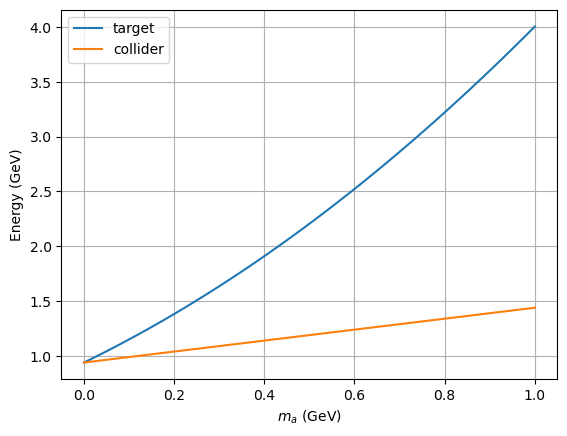

In [16]:
mas = np.linspace(0., 1)
plt.plot(mas, ene_thr_tar(mas, mp), label = 'target')
plt.plot(mas, ene_thr_col(mas, mp), label = 'collider')
plt.xlabel(r'$m_a$ (GeV)'); plt.ylabel('Energy (GeV)'); plt.grid(); plt.legend();

### 2.5 ejercicio

En un experimento de blanco fijo un haz de protones golpea un blanco, encontrar la energía del haz, $E$, para que tenga lugar el proceso:

$$
p + p \to p + p + p + \bar{p}
$$

El invariante $s$ es igual en los casos:

i) inicial en el laboratorio: $s = (E+m_p,  {\bf p})^2$

ii) final en el CM con el caso de menor energía en el que las partículas quedan en reposo: $s = (4 m_p, {\bf 0})$

Así:

$$
(E+m_p)^2 - p^2 = 16 m^2_p, \;\; E^2 + 2Em_p + m^2_p - p^2 = 16 m^2_p, \\
m^2_p + p^2 + 2 E m_p + m^2_p - p^2 = 16 m^2_p \\
2 E m_p = 14 m^2_p, \;\; E = 7 m_p
$$

In [17]:
print('Threshold energy {:4.3f} GeV'.format(7 * mp))

Threshold energy 6.568 GeV


### 2.5 ejercicio

Considera un experimento de blanco fijo $p+p$, ¿cuál es la energía del haz de protones para que en el CM tenga la energía del LHC, $\sqrt{s} = 14$ TeV?

[MT1.P10]

En el sistema de laboratorio: $s = (E + m_p, {\bf p})$, por lo que:

$$
(E+m_p)^2 - p^2 = s, \;\; 2E m_p + 2m^2_p = s \\
E = \frac{s- 2m^2_p}{2m_p}
$$

In [18]:
ss   = (14 * 1e3) **2 ## GeV^2
ethr =  (ss - 2 * mp**2)/(2*mp)
print('Energy threshold {:e} TeV'.format(ethr/1e3))

Energy threshold 1.044473e+05 TeV


*ejercicio*: La producción resonante del barión $\Delta^0$ ocurren en la interacción de $\pi^- + p$ en un experimento de blanco fijo con el momento del $\pi^-$ es 300 MeV. Indica el valor de la masa del $\Delta^0$.

*ejercicio*: En LEP el colisionador $e + e^+$ las corrientes de los haces eran de 1 mA, tenía una circunferencia de 27 km y cuatro paquetes en cada haz con una sección $1.8 \, 10^4$ $\mu$m$^2$. Calcula la luminosidad instantánea, $\mathcal{L}(t)$.

*ejercicio*: En un futuro colisionador $e+e^+$ con $\sqrt{s} = 250$ GeV, la sección eficaz $e+e^+ \to H + Z$ es 250 fbarns. Si su luminosidad instantánea es $\mathcal{L}(t) = 2 \, 10^{34}$ cm$^{-2}$s$^{-1}$ y está operacional el 60% del tiempo, ¿cuántos bosones de Higgs produce en 5 años?

*ejercicio*: En el colisionador HERA colisionaban protones de 820 GeV con electrones de 27.5 GeV, calcula su energía en el centro de masas.

## Cambios de sistema de referencia

### 3.1 ejercicio

El siguiente proceso se llama fotoproducción, $\gamma + p \to p + \pi^0$, con en protón en reposo, encuentra la energía umbral del fotón. 

Los fotones de la radiación electromagnética de fondo del Universo tienen una energía máxima de 1 meV (el pico de la distribución está en 0.37 meV, corresponde a una temperatura de 3 K). Calcula la energía mínima de los protones de los rayos cósmicos para que se produzca fotoproducción. 

[AB1.P7]

a) El invariante $s$ antes de la interacción en el laboratorio y después en el CM son iguales:

$$
(E_\gamma + m_p, {\bf p_\gamma})^2 = (m_p + m_\pi, {\bf 0})^2
$$

donde $|{\bf p}_\gamma| = E_\gamma$, luego:
$$
(E_\gamma + m_p)^2 - E^2_\gamma = (m_p + m_\pi)^2, \\
2E_\gamma m_p + m^2_p = m^2_p + 2 m_p m_\pi + m^2_\pi \\
$$

Por lo tanto:
$$
E_\gamma = m_\pi + \frac{m^2_\pi}{2m_p} 
$$

In [19]:
mpi = 0.135 # GeV
photoprod_ethr = lambda mpi, mp : mpi + 0.5 * mpi**2 /mp
egamma = photoprod_ethr(mpi, mp)
ss  = (mpi + mp)**2
print('E threshold of photoproduction {:4.3f} GeV'.format(egamma))
print('s           of photoproduction {:4.3f} GeV^2'.format(ss))

E threshold of photoproduction 0.145 GeV
s           of photoproduction 1.152 GeV^2


b) La colisión $\gamma + p $ es máxima si es enfrentada, en ese caso tenemos:

$$
s = (E_\gamma + E_p, {\bf p}_\gamma + {\bf p}_p)^2 = (E_\gamma + E_p)^2 - ({\bf p}_\gamma + {\bf p}_p) = E^2_\gamma + E^2_p + 2E_\gamma E_p - E^2_\gamma - p^2_p - 2 E_\gamma p_p \\
s = m^2_p + 2 E_\gamma (E_p + p_p)
$$

La energía del protón, que como veremos es muy alta ypor lo tanto podemos aproximar $p_p \simeq E_p, es$

$$
E_p \simeq \frac{s-m^2_p}{4E_\gamma}
$$



In [20]:
egamma = 1e-3 / units.giga# # GeV
ep     = (ss - mp**2) / ( 4 * egamma)
print('proton energy {:e} GeV'.format(ep))

proton energy 6.788962e+10 GeV


### 3.2 ejercicio

Sea una partícula $a$ con masa $m_a$ que se desintegra a otras dos $a \to b+c$, con masas $m_b, m_c$. Da las expresiones de la energía y momento de $b, c$ en el CM. Demostrar que el momento de las partículas hijas en el CM es:
            
$$
p^* = \frac{1}{2m_a} \sqrt{[m^2_a - (m_b+m_c)^2] [m^2_a - (m_b - m_c)^2]}
$$

[AB1.P11]

Ver [apéndice-fundamentos, sección del invariante s]

$$
E^*_b = \frac{m^2_a + m^2_b - m^2_c}{2 m_a}, \\
E^*_c = \frac{m^2_a + m^2_c - m^2_b}{2 m_a}, \\
$$
$$
p^*   = \frac{\sqrt{\left[m^2_a - (m_b+m_c)^2 \right] \left[ m^2_a - (m_b - m_a)^2 \right]}}{2m_a}   
$$

### 3.3 ejercicio

Calcula la energía y momento de las partículas finales en el CM en la desintegración $\pi^+ \to \mu^+ + \nu_\mu$ y $\pi^+ \to e^+ + \nu_e$.

In [21]:
mpi = 139.6 # MeV
mmu = 105.6 # MeV
ss  = mpi**2
emu = energy_cm_2body  (mpi, mmu, 0)
enu = energy_cm_2body  (mpi, 0  , mmu)
pcm = momentum_cm_2body(mpi, mmu, 0)
print('E muon {:4.3f} MeV'.format(emu))
print('E nu   {:4.3f} MeV'.format(enu))
print('p      {:4.3f} MeV'.format(pcm))

E muon 109.740 MeV
E nu   29.860 MeV
p      29.860 MeV


In [22]:
mpi = 139.6 # MeV
me  = 0.511 # MeV
emu = energy_cm_2body  (mpi, me, 0)
enu = energy_cm_2body  (mpi, 0 , me)
pcm = momentum_cm_2body(mpi, me, 0)
print('E elec {:4.3f} MeV'.format(emu))
print('E nu   {:4.3f} MeV'.format(enu))
print('p      {:4.3f} MeV'.format(pcm))

E elec 69.801 MeV
E nu   69.799 MeV
p      69.799 MeV


### 3.4 ejercicio

Sean $\Lambda \to p + \pi^-$ y $\Xi^- \to \Lambda + \pi^-$. ¿Cuál es la carga de $\Lambda$? Indica si son bariones o mesones $\Lambda$ y $\Xi^-$. Busca sus masas en PDG, sus vidad medias y su fracción de desintegración. ¿Qué tipo de desintegración es, débil o fuerte? Da el momento y energía en CM de la desintegración

[AB1.P12]

Del [PDG](https://pdg.lbl.gov/2021/listings/contents_listings.html)

$m(\Lambda) = 1115.683 \pm 0.006$ MeV, $\mathcal{Br}(\Lambda \to p + \pi^-) = 63.9 \pm 0.5$ %, $\tau = (2.632 \pm 0.02) \, 10^{-10}$ s

Del [PDG](https://pdg.lbl.gov/2021/listings/contents_listings.html)
                                        
$m(\Xi^-) = 1321.71 \pm 0.07$ MeV, $\mathcal{Br}(\Xi^- \to \Lambda + \pi^-) = 99.9$ %, $\tau = (1.639 \pm 0.015) \, 10^{-10}$ s

Los dos son bariones, $\Lambda$ tiene carga 0, y por el valor de la vida media se desintegran débilmente.

In [23]:
mlambda = 1115.68 # MeV
mp      = 938.27 # MeV
mpi     = 139.6 # MeV
ep  = energy_cm_2body  (mlambda, mp , mpi)
epi = energy_cm_2body  (mlambda, mpi, mp)
pp  = momentum_cm_2body(mlambda, mp , mpi)
print('E p {:4.3f} MeV'   .format(ep))
print('E pi   {:4.3f} MeV'.format(epi))
print('p      {:4.3f} MeV'.format(pp))

E p 943.642 MeV
E pi   172.038 MeV
p      100.544 MeV


In [24]:
mxi     = 1321.71 # MeV
ep  = energy_cm_2body  (mxi, mlambda, mpi)
epi = energy_cm_2body  (mxi, mpi    , mlambda)
pp  = momentum_cm_2body(mxi, mlambda, mpi)
print('E p {:4.3f} MeV'   .format(ep))
print('E pi   {:4.3f} MeV'.format(epi))
print('p      {:4.3f} MeV'.format(pp))

E p 1124.366 MeV
E pi   197.344 MeV
p      139.487 MeV


### 3.5 ejercicio

Encontrar el ángulo mínimo de apertura entre los fotones de la desintegración $\pi^0 \to \gamma \gamma$ si la energía del pión es 10 GeV. [MT2.9]

Sea $a \to b + c$, $p_a = p_b + p_c$, en el sistema laboratorio
$$
s = (E_b + E_c, {\bf p}_b + {\bf p_c})^2 = (E_b + E_c)^2 - E^2_b - E^2_c- 2 E_b E_c \cos \theta_{bc} \\
 s = 2 E_b E_c ( 1 - \cos \theta_{bc}) = 4 E^2 x (1-x) \sin^2 \frac{\theta_{bc}}{2} \\
 \sin \frac{\theta_{bc}}{2} = \sqrt{\frac{s}{4 E^2 x (1-x)}}
$$
donde $x  \in [0, 1]$, siendo $s = m^2_\pi = (0.135)^2$ GeV$^2$ y $E = 10$ GeV.

El valor mínimo de $\theta_{bc}$ corresponde al máximo de $x(1-x)$ que es $x = 1/2$, esto es $E_b = E_c = 5$ GeV


theta min angle 0.0270 rad, 1.547 degrees


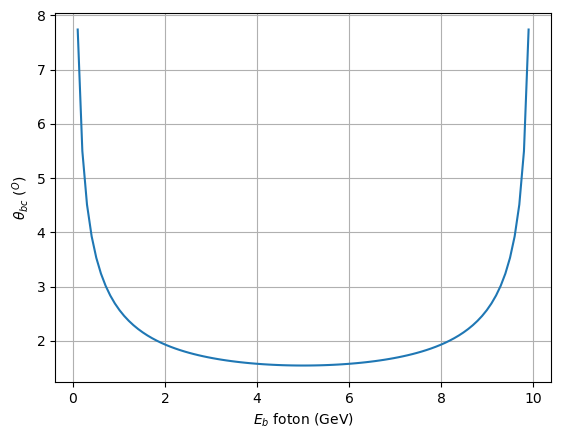

In [25]:
mpi = 0.135 ## GeV
E   = 10 # GeV

def pi_theta(x, ss, E):    
    den = 4 * E**2 * x * (1 - x)
    if (den == 0): return np.nan
    return 2 * np.arcsin( np.sqrt(ss/den) )

xs = np.linspace(0., 1.,  100)
thetas = [180 * pi_theta(xi, mpi*mpi, E)/ np.pi for xi in xs]
plt.plot(E * xs, thetas); 
plt.xlabel(r'$E_b$ foton (GeV)'); plt.ylabel(r'$\theta_{bc}$ ($^O$)'); plt.grid();

theta_min = pi_theta(0.5, mpi*mpi, E)
print('theta min angle {:5.4f} rad, {:5.3f} degrees'.format(theta_min, 180*theta_min/np.pi))

Por otro lado el valor mínimo de la energía, de la fracción $x$, debe corresponder al máximo $\theta = \pi, \sin^2 \theta/2 = 1$, por lo que:

$$
x(1-x) = \frac{s}{4E^2},\;\; x = \frac{1 - \sqrt{1 - s/E^2}}{2} 
$$

In [26]:
mpi = 0.135 # GeV
E   = 10. # GeV
xmin = (1 - np.sqrt(1 - mpi*mpi/E**2))/2
print('minimum energy {:4.3f} keV'.format(E * xmin * 1e6))

minimum energy 455.646 keV


Otra forma de hacer el ejercicio es mediante las transformaciones de Lorentz.

En el sistema CM, los cuadrimomentos de los fotones son:

$$
p_b = \frac{m_\pi}{2} (1, 0, \sin \theta^*, \cos \theta^*), \\
p_c = \frac{m_\pi}{2} (1, 0, -\sin \theta^*, -\cos \theta^*),
$$
donde $\theta^*$ es el ángulo respecto al eje $z$.

En el sistema de laboratorio, los cuadrimomentos son:
$$
p'_b = \frac{m_\pi}{2} \left(\gamma(1 + \beta \cos \theta^*), 0, \sin \theta^*, \gamma(\beta + \cos \theta^*) \right), \\
p'_c = \frac{m_\pi}{2} \left(\gamma(1 - \beta \cos \theta^*), 0, -\sin \theta^*, \gamma(\beta - \cos \theta^*) \right),
$$

En producto escalar de los momentos de los fotones en el sistema laboratorio es:
  
$$
{\bf p'}_{b} {\bf p'}_c = \frac{m^2_\pi}{4} \left( - \sin^2 \theta^* + \gamma^2 (\beta^2 - \cos^2 \theta^*)\right) \\
= \frac{m^2_\pi}{4} \gamma^2 \left( -(1 - \beta^2) (1-\cos^2\theta^*) + (\beta^2 - \cos^2 \theta^*) )\right)
= \frac{m^2_\pi}{4}\gamma^2 \left( \beta^2 - 1 - \beta^2 \cos^2\theta^* \right)
$$
donde $\gamma^2 = (1-\beta^2)^{-1}$



Por otra parte: ${\bf p'}_{b} {\bf p'}_c = E_b E_c \cos \theta_{bc}$, así:

$$
E_b = \frac{m_\pi}{2} \gamma (1 + \beta \cos \theta^*), \\
E_c = \frac{m_\pi}{2} \gamma (1 - \beta \cos \theta^*), \\
\cos \theta_{bc} = \frac{2\beta^2 -1 - \beta^2 \cos^2 \theta^*}{1 - \beta^2 \cos^2 \theta^*}
$$

En este caso para $\theta^* = \pi/2$ tenemos $\theta_{bc}$ mínimo:
$$
\cos \theta_{bc} = 2\beta^2 -1
$$
Donde:
$$
    \beta = \frac{p}{E} = \sqrt{1 - \frac{m^2}{E^2}}
$$

theta min 0.027 rad, 1.547 degrees


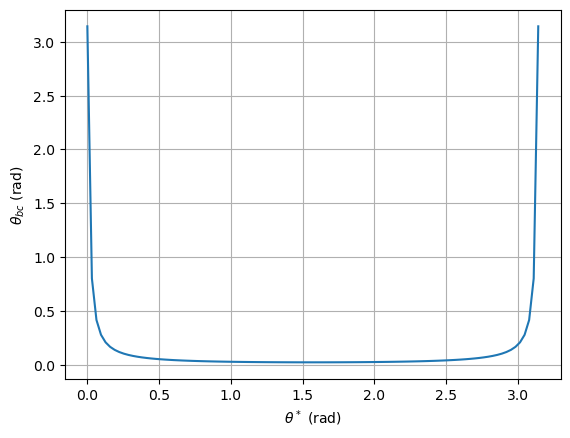

In [27]:
beta = np.sqrt(E**2 - mpi*mpi)/E
ctheta = 2*beta*beta -1
thetamin = np.arccos(ctheta)
print('theta min {:4.3f} rad, {:4.3f} degrees'.format(thetamin, 180 * thetamin / np.pi)) 

ctheta_bc = lambda theta: (2*beta**2 -1 - beta**2 * np.cos(theta)**2) / (1 - beta**2 * np.cos(theta)**2)
thetas = np.linspace(0, np.pi, 100)
plt.plot(thetas, np.arccos(ctheta_bc(thetas)));
plt.grid(); plt.xlabel(r'$\theta^*$ (rad)'); plt.ylabel(r'$\theta_{bc}$ (rad)');

La energía mínima de $E_c$ correspondera para el caso $\theta^* = 0$.

$$
E^{min}_c = \frac{m_\pi}{2} \gamma (1 - \beta)
$$


In [28]:
emin = (mpi/2) * (E/mpi) * (1 - beta)
print('E foton min {:4.3f} KeV'.format(emin * 1e6))

E foton min 455.646 KeV


### Ejercicio 3.6

La partícula $\Lambda$, se desintegra $\Lambda \to p + \pi^-$. Si $p_\Lambda = 2$ GeV y el $p$ sale con $\theta^* = 30^o$ en el CM respecto la dirección de $\Lambda$, calcular: 

a) la energía de $\Lambda, \pi^-$ en el CM. 

b) el factor de Lorentz $\gamma$ y $\beta$ entre el sistema laboratorio y el CM.

c) ángulo y momento del $\pi, p$ en el sistema laboratorio.

[AB1.15]

In [29]:
mlambda = 1115.68 # MeV
mp      = 938.27 # MeV
mpi     = 139.57 # MeV
ep  = energy_cm_2body  (mlambda, mp , mpi)
epi = energy_cm_2body  (mlambda, mpi, mp)
pp  = momentum_cm_2body(mlambda, mp , mpi)
print('E p  = {:4.3f} MeV'.format(ep))
print('E pi = {:4.3f} MeV'.format(epi))
print('p    = {:4.3f} MeV'.format(pp))

E p  = 943.645 MeV
E pi = 172.035 MeV
p    = 100.579 MeV


In [30]:
plambda = 2000
elambda = energy(mlambda, plambda)
print('lambda energy {:4.3f} MeV'.format(elambda))
gamma = gamma_lorentz(elambda, mlambda)
beta  = beta_lorentz (plambda, elambda)
print('beta = {:4.3f}, gamma {:4.3f} '.format(beta, gamma))

lambda energy 2290.140 MeV
beta = 0.873, gamma 2.053 


Se cumple que: 
$$
 p_x  = p \sin \theta = p^* \sin \theta^*,\\ 
p_z  = p \cos \theta = \gamma(\beta E + p^* \cos \theta^*) 
$$
donde $p, \theta$ es el momento y el ángulo en el lab.

Luego:

$$
\tan \theta = \frac{p^* \sin \theta}{\gamma(\beta E + p^* \cos \theta^*)}
$$


In [31]:
theta_cm = (30./180.) * np.pi
pp_cm   = np.array((ep ,  pp *np.sin(theta_cm), 0,  pp * np.cos (theta_cm)))
ppi_cm  = np.array((epi, -pp *np.sin(theta_cm), 0, -pp * np.cos (theta_cm)))
pla_cm  = ppi_cm + pp_cm

p_write(ppi_cm, 'pi')
p_write(pp_cm , 'p')
p_write(pla_cm, 'lambda')
print('pi : theta = {:4.1f} (o) '.format(theta_angle(ppi_cm) * (180/np.pi)))

pi:  p  = [172.035, -50.289, 0.000, -87.104]
pi: |p| =  100.579, mass = 139.570
p:  p  = [943.645, 50.289, 0.000, 87.104]
p: |p| =  100.579, mass = 938.270
lambda:  p  = [1115.680, 0.000, 0.000, 0.000]
lambda: |p| =  0.000, mass = 1115.680
pi : theta = -150.0 (o) 


In [32]:
lorentz = lorentz_matrix(beta)
pp_lab  = lorentz.dot( pp_cm .transpose() )
ppi_lab = lorentz.dot( ppi_cm.transpose() )
pla_lab = ppi_lab + pp_lab

p_write(ppi_lab, 'pi')
p_write(pp_lab , 'p')
p_write(pla_lab, 'lambda')
print('p  : theta = {:4.1f} (o) '.format(theta_angle(pp_lab ) * (180/np.pi)))
print('pi : theta = {:4.1f} (o) '.format(theta_angle(ppi_lab) * (180/np.pi)))

pi:  p  = [196.988, -50.289, 0.000, 129.597]
pi: |p| =  139.013, mass = 139.570
p:  p  = [2093.152, 50.289, 0.000, 1870.403]
p: |p| =  1871.079, mass = 938.270
lambda:  p  = [2290.140, 0.000, 0.000, 2000.000]
lambda: |p| =  2000.000, mass = 1115.680
p  : theta =  1.5 (o) 
pi : theta = -21.2 (o) 


### Ejercicio 

Calcula el número de $Z$ producidos en OPAL en la energía $\sqrt{s}= m_Z$ y durante un año ($10^7$ s). Calcula el número de pares $\tau + \tau^+$ producidos, la distancia media que recorren, y el número de eventos esperados $\mu+ \mu^+$ que provienen de $\tau + \tau^+$.

Calcula la distancia media recorrida por los $\tau$

La luminosidad del LEP $\mathcal{L} = 10^{32}$ 1/cm$^2$s, y la sección eficaz en el pico $\sigma = $

La amchura desintegración a $\tau + \tau^+$ es $\Gamma_{\tau\tau}$ siendo la total $\Gamma_Z = 2.5$ GeV

Y finalmente la fracción de desintegración $\mathcal{Br}(\tau \to \mu + \bar{\nu}_\mu + \nu_\tau)$

Luego

$$
N = \mathcal{L} \, \sigma \, t \, \frac{\Gamma_{\tau\tau}}{\Gamma_Z} \, \mathcal{Br}^2
$$    

In [33]:
sigma = 60e-9   # nb
barn  = 1e-24 # cm2
lumi  = 5e31  # 1/cm2s
time  = 1e7
G_Z   = 2.5   # GeV
G_Zmu = 0.085 # GeV
eff   = 1. 

nZ      = lumi * sigma * barn * time
nZ_mumu = nZ * G_Zmu/G_Z
n_mumu  = nZ_mumu * (eff**2)

print('Z producced {:4.4f} M '.format(nZ/1e6))
print('Z mumu producced {:4.4f} M'.format(nZ_mumu/1e6))
print('Z mumu detected  {:4.4f} M'.format(n_mumu/1e6))

Z producced 30.0000 M 
Z mumu producced 1.0200 M
Z mumu detected  1.0200 M


In [34]:
n  = n_mumu
nZ = sigma * barn * time * lumi
print('Z producted {:4.1f} M'.format(nZ/1e6))
nZ_mumu = n/(eff**2)
print('Zmumu estimated {:4.3f} M'.format(nZ_mumu/1e6))
Br   = nZ_mumu / nZ
print('Br (Z->mumu) {:4.4f}'.format(Br))
G_mumu = Br * G_Z
print('Gamma Z->mumu {:4.4f} MeV'.format(1e3*G_mumu))

Z producted 30.0 M
Zmumu estimated 1.020 M
Br (Z->mumu) 0.0340
Gamma Z->mumu 85.0000 MeV


*ejercicio*: En el proceso $a + b \to c + d$, consideramos los tres invarantes de Maldelstam, $s = (p_a+p_b)^2, \, t = (p_c-p_a)^2, \, u = (p_d-p_a)^2$, demostrar que:

$$
s + t + u = m^2_a + m^2_b + m^2_c + m^2_d
$$

## 4 Básicos de diagramas de Feynman

*ejercicio*: Indica si son posibles o no y por qué los siguientes vértices:
        
  * $e, e, \gamma$
  
  * $\nu_e, \nu_e, \gamma$
  
  * $e, e^+, \gamma$
  
  * $\nu_e, \nu_e, Z$
  
  * $e, \mu, \gamma$
  
  * $e, \nu_e, W$
  
  * $e, \tau, Z$
  
  * $e, \nu_\mu, W$
  
  * $e, e, g$
  
  * $b, b, g$
  
  * $d, s, g$
  
  * $\gamma, \gamma, \gamma$
  
  * $u, u, W$
  
  * $u, d, W$
  
  * $d, t, W$
  

*ejercicio*: Dibuja los diagramas de Feynman para los siguientes procesos:

  * $\tau \to \pi^- + \nu_\tau$, siendo $\pi^-$ la combinación de quarks ($d\bar{u}$)
  
  * $\pi^+ \to \mu^+ + \nu_\mu$.
  
  * $K^+ \to  \mu^+ + \nu_\mu$, siendo $K^+$ la combinación ($s\bar{u}$)


*ejercicio*: Dibuja los diagramas de Fynman para los sigientes procesos:

  * $\tau \to \mu + \bar{\nu}_\mu + \nu_\tau$
  
  * $\tau \to e + \bar{\nu}_e + \nu_\tau$
  
  * $\mu \to e + \bar{\nu}_e + \nu_\mu$

*ejercicio*: Considera $\pi^0$ una combinación $(u\bar{u})$ y dibuja e indica su relativa intensidad de las siguientes desintegraciones teniendo en cuenta en número de vértices:

  * $\pi^0 \to \gamma \gamma$
  
  * $\pi^0 \to \gamma + e + e^+$
  
  * $\pi^0 \to e + e^+$

*ejercicio*: Dibuja los diagramas árbol de las posible interacciones, e indica si son aniquilaciones o interacciones:
        
  * $e+e\to e+e$
  
  * $e+e^+ \to \mu + \mu^+$
  
  * $e + e^+ \to e + e^+$
  
  * $e + \nu_e \to e + \nu_e$
  
  * $e + \bar{\nu}_e \to e + \bar{\nu}_e$

## 4 Detectors


### 4.1 ejercicio

Sea un $\pi^\pm$ y un $K^\pm$ con el mismo momento $p$ 4 GeV, evaluar la distancia $L$ que deben recorrer entre dos centelleadores cuya resolución temporal es $\sigma_t = 300$ ps, para que puedan distinguirse con la medida de su tiempo de vuelo en al menos dos descibaciones estándard.

[AB1.24]

## Otros

*ejercicio*: Demostrar que en un sistema de partículas con cuadrimomentos $p_i$, $i = 1, \dots, n$, la cantidad: 
$$
\left( \sum_i E_i \right)^2 - \left( \sum_i {\bf p}_i \right)^2
$$
es un invariante Lorentz

*ejercicio*: Demostrar que $\hat{P} \, u_+ (\theta, \phi) = v_-(\pi-\theta, \pi + \theta)$

### Bibliografía

* "Elementary Particle Physics", S. Bettini, Cambridge.

* "Modern Particle Physics", Mark Thomson, Cambridge.

* "Lepton and Quark", Francis Halzen, Alan D. Martin, Josh Wiley & Sons.

